In [1]:
import numpy as np
import pandas as pd
import neural_network_batch as nn
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
data_addresses=["Datasets/sentiment labelled sentences/amazon_cells_labelled.txt",
                "Datasets/sentiment labelled sentences/imdb_labelled.txt",
               "Datasets/sentiment labelled sentences/yelp_labelled.txt"]

In [3]:
l=[]
for d in data_addresses:
    l.append(pd.read_csv(d,sep='\t',names=['tweet','label']))
df=pd.concat(l,axis=0)  

In [4]:
df.head()
df.shape


(2748, 2)

<AxesSubplot:xlabel='label', ylabel='count'>

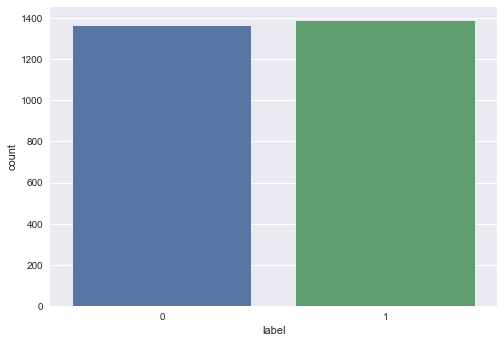

In [5]:
plt.style.use('seaborn')
sns.countplot(x='label',data=df)

In [6]:
df.head()

,tweet,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [7]:
df.shape

(2748, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   2748 non-null   object
 1   label   2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 128.9+ KB


In [9]:
s=set()

for i in df.iloc[:,0]:
    s.update(i.split())

print("Total No of words is {}".format(len(s)))

df.shape

# we have LOTs of total words. So we need to remove some of the words

print(pd.unique(df['label']))

# Only two unique moods 0 and 4


df.head()

print(pd.unique(df['label']))
print(df.info())

data=np.array(df)

print(data.shape,data)



from nltk.tokenize import RegexpTokenizer


def split_(str):
    tk=RegexpTokenizer('\S*[@.]\S*')# words containing @ or . (like websites) are of no use 
    s=set(tk.tokenize(str))
    str=[w for w in str.split() if w not in s]
    tk = RegexpTokenizer('[a-zA-a]+')# only words
    return (" ".join(tk.tokenize(" ".join(str)))).lower()# return string having only simple words
    
    



str="t Gagan Walia 1,2,3 gaganwalia212@gmail.com @gaganWalia gaganw@@@ a #myBiden!!  www.google.com ??? , "
print(split_(str))

# Data Preprocessing using NLTK

## Split the words
#### We dont need numbers, websites,usernames(start with @),emails,
#### Need only simple words
#### Hashtags are important but only their names.


data[:,0]=(np.vectorize(split_)(data[:,0]))

print(data)

### Remove the stopwords

stopwordlist = set(['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves',
               "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", 
                "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", 
                "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", 
                "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", 
                "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", 
                "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", 
                "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", 
                "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", 
                "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just",
                "don", "should", "now"])

def remove_stopwords(str):
    return " ".join([w for w in str.split() if w not in stopwordlist ])
data[:,0]=(np.vectorize(remove_stopwords)(data[:,0]))


print(data)

s=set()
for w in data[:,0]:
    s.update(w.split())

print("Total no of words now = {}".format(len(s)))

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer


porter=PorterStemmer()
lancaster=LancasterStemmer()

print(porter.stem("Lovely"),lancaster.stem("Lovely"))

print(porter.stem("daring"),lancaster.stem("daring"))

print(porter.stem("better"),lancaster.stem("better"))

def stem_on_sentence(str):
    return " ".join([porter.stem(w) for w in str.split()])
data[:,0]=(np.vectorize(stem_on_sentence)(data[:,0]))

data

s=set()
for w in data[:,0]:
    s.update(w.split())
print("Total no of words now = {}".format(len(s)))

### Create vocabulary

vocab={}
freq={}
i=0
for x in data[:,0]:
    for word in x.split():
        if(word not in freq):  
            freq[word]=1
        else:
            freq[word]+=1

for x in data[:,0]:
    for word in x.split():
        if(word not in vocab and freq[word]>0):
            vocab[word]=i
            i+=1
            

print(len(vocab),vocab)

vocab_rev=dict([(x,y) for y,x in vocab.items()])

vocab_rev

total_no_of_features=len(vocab)

converted_data=np.full((data.shape[0],total_no_of_features+1),0,dtype='int8')# last column will store labels

converted_data.shape

for i in range(data.shape[0]):
    for word in data[i][0].split():
        if(word in vocab):
            converted_data[i][vocab[word]]=1
    converted_data[i][-1]=data[i][1]

Total No of words is 8012
[0 1]
[0 1]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   2748 non-null   object
 1   label   2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 128.9+ KB
None
(2748, 2) [['So there is no way for me to plug it in here in the US unless I go by a converter.'
  0]
 ['Good case, Excellent value.' 1]
 ['Great for the jawbone.' 1]
 ...
 ['Overall I was not impressed and would not go back.' 0]
 ["The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time."
  0]
 ["Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check."
  0]]
t gagan walia a mybiden
[['so there is no way for me to plug it in here in the us unless i go by a'
  0]
 ['good case excellent' 1]
 ['great for the' 1]
 ...
 ['overall i was not i

In [10]:
print(converted_data.shape)

(2748, 3602)


In [11]:
np.random.seed(0)
np.random.shuffle(data)
split=0.85
split=int(0.85*data.shape[0])
x_train=converted_data[:split,:-1]
y_train=converted_data[:split,-1]
x_test=converted_data[split:,:-1]
y_test=converted_data[split:,-1]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(2335, 3601) (2335,) (413, 3601) (413,)


### Defining the neural network

In [12]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras
from  keras import regularizers

In [32]:
model=Sequential()

In [33]:
# Adding the layers
hl1=Dense(units=20,activation='relu',input_dim=3601, 
          kernel_regularizer=regularizers.l1(0.000),kernel_initializer=tf.keras.initializers.Ones(),
         bias_initializer=tf.keras.initializers.Ones())
model.add(hl1)
model.add(Dense(units=20,activation='relu', kernel_regularizer=regularizers.l1(0.000),kernel_initializer=tf.keras.initializers.Ones(),
         bias_initializer=tf.keras.initializers.Ones()))
model.add(Dense(units=1,activation='sigmoid', kernel_regularizer=regularizers.l1(0.000),kernel_initializer=tf.keras.initializers.Ones(),
         bias_initializer=tf.keras.initializers.Ones()))

In [34]:
# compiling the model
opt=tf.keras.optimizers.SGD(learning_rate=0.00901)
model.compile(optimizer=opt,
              loss=tf.keras.losses.binary_crossentropy,
              metrics=[tf.keras.metrics.binary_accuracy,tf.keras.metrics.binary_crossentropy])

In [35]:
history=model.fit(x_train,y_train,batch_size=100,epochs=500,validation_data=(x_test,y_test))

Epoch 1/500
24/24 [==============================] - 2s 28ms/step - loss: 354.5673 - binary_accuracy: 0.5169 - binary_crossentropy: 354.5673 - val_loss: 266.6845 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 266.6845
Epoch 2/500
24/24 [==============================] - 0s 10ms/step - loss: 190.1713 - binary_accuracy: 0.5015 - binary_crossentropy: 190.1713 - val_loss: 80.3231 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 80.3231
Epoch 3/500
24/24 [==============================] - 0s 10ms/step - loss: 98.7110 - binary_accuracy: 0.5054 - binary_crossentropy: 98.7110 - val_loss: 117.9844 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 117.9844
Epoch 4/500
24/24 [==============================] - 0s 15ms/step - loss: 84.0887 - binary_accuracy: 0.4861 - binary_crossentropy: 84.0887 - val_loss: 37.5252 - val_binary_accuracy: 0.5835 - val_binary_crossentropy: 37.5252
Epoch 5/500
24/24 [==============================] - 0s 9ms/step - loss: 58.4817 - binary_accura

Epoch 38/500
24/24 [==============================] - 0s 12ms/step - loss: 0.7268 - binary_accuracy: 0.5109 - binary_crossentropy: 0.7268 - val_loss: 0.7313 - val_binary_accuracy: 0.4358 - val_binary_crossentropy: 0.7313
Epoch 39/500
24/24 [==============================] - 0s 9ms/step - loss: 0.7317 - binary_accuracy: 0.5024 - binary_crossentropy: 0.7317 - val_loss: 0.8200 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.8200
Epoch 40/500
24/24 [==============================] - 0s 8ms/step - loss: 0.7285 - binary_accuracy: 0.5101 - binary_crossentropy: 0.7285 - val_loss: 0.7148 - val_binary_accuracy: 0.4697 - val_binary_crossentropy: 0.7148
Epoch 41/500
24/24 [==============================] - 0s 9ms/step - loss: 0.7746 - binary_accuracy: 0.5169 - binary_crossentropy: 0.7746 - val_loss: 0.7049 - val_binary_accuracy: 0.4939 - val_binary_crossentropy: 0.7049
Epoch 42/500
24/24 [==============================] - 0s 11ms/step - loss: 0.7300 - binary_accuracy: 0.5036 - binary_cr

24/24 [==============================] - 0s 10ms/step - loss: 0.6983 - binary_accuracy: 0.5015 - binary_crossentropy: 0.6983 - val_loss: 0.7053 - val_binary_accuracy: 0.4358 - val_binary_crossentropy: 0.7053
Epoch 76/500
24/24 [==============================] - 0s 13ms/step - loss: 0.7085 - binary_accuracy: 0.5092 - binary_crossentropy: 0.7085 - val_loss: 0.7325 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7325
Epoch 77/500
24/24 [==============================] - 0s 9ms/step - loss: 0.7088 - binary_accuracy: 0.5024 - binary_crossentropy: 0.7088 - val_loss: 0.6999 - val_binary_accuracy: 0.4697 - val_binary_crossentropy: 0.6999
Epoch 78/500
24/24 [==============================] - 0s 9ms/step - loss: 0.7026 - binary_accuracy: 0.5101 - binary_crossentropy: 0.7026 - val_loss: 0.7064 - val_binary_accuracy: 0.4262 - val_binary_crossentropy: 0.7064
Epoch 79/500
24/24 [==============================] - 0s 9ms/step - loss: 0.7021 - binary_accuracy: 0.5096 - binary_crossentropy: 0

24/24 [==============================] - 0s 18ms/step - loss: 0.6971 - binary_accuracy: 0.5096 - binary_crossentropy: 0.6971 - val_loss: 0.7016 - val_binary_accuracy: 0.4140 - val_binary_crossentropy: 0.7016
Epoch 113/500
24/24 [==============================] - 0s 16ms/step - loss: 0.6996 - binary_accuracy: 0.5049 - binary_crossentropy: 0.6996 - val_loss: 0.6937 - val_binary_accuracy: 0.4867 - val_binary_crossentropy: 0.6937
Epoch 114/500
24/24 [==============================] - 0s 16ms/step - loss: 0.6946 - binary_accuracy: 0.5079 - binary_crossentropy: 0.6946 - val_loss: 0.7035 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7035
Epoch 115/500
24/24 [==============================] - 0s 14ms/step - loss: 0.6954 - binary_accuracy: 0.5122 - binary_crossentropy: 0.6954 - val_loss: 0.6911 - val_binary_accuracy: 0.4939 - val_binary_crossentropy: 0.6911
Epoch 116/500
24/24 [==============================] - 0s 11ms/step - loss: 0.6998 - binary_accuracy: 0.5173 - binary_crossent

Epoch 149/500
24/24 [==============================] - 0s 12ms/step - loss: 0.6938 - binary_accuracy: 0.5088 - binary_crossentropy: 0.6938 - val_loss: 0.6963 - val_binary_accuracy: 0.4383 - val_binary_crossentropy: 0.6963
Epoch 150/500
24/24 [==============================] - 0s 10ms/step - loss: 0.6948 - binary_accuracy: 0.5084 - binary_crossentropy: 0.6948 - val_loss: 0.6901 - val_binary_accuracy: 0.5230 - val_binary_crossentropy: 0.6901
Epoch 151/500
24/24 [==============================] - 0s 14ms/step - loss: 0.6937 - binary_accuracy: 0.5058 - binary_crossentropy: 0.6937 - val_loss: 0.6961 - val_binary_accuracy: 0.4383 - val_binary_crossentropy: 0.6961
Epoch 152/500
24/24 [==============================] - 0s 12ms/step - loss: 0.6931 - binary_accuracy: 0.5152 - binary_crossentropy: 0.6931 - val_loss: 0.7045 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7045
Epoch 153/500
24/24 [==============================] - 0s 18ms/step - loss: 0.6932 - binary_accuracy: 0.5161 - b

Epoch 186/500
24/24 [==============================] - 0s 11ms/step - loss: 0.6927 - binary_accuracy: 0.5178 - binary_crossentropy: 0.6927 - val_loss: 0.6995 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.6995
Epoch 187/500
24/24 [==============================] - 0s 17ms/step - loss: 0.6928 - binary_accuracy: 0.5186 - binary_crossentropy: 0.6928 - val_loss: 0.6982 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.6982
Epoch 188/500
24/24 [==============================] - 0s 11ms/step - loss: 0.6932 - binary_accuracy: 0.5173 - binary_crossentropy: 0.6932 - val_loss: 0.7005 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7005
Epoch 189/500
24/24 [==============================] - 0s 10ms/step - loss: 0.6928 - binary_accuracy: 0.5191 - binary_crossentropy: 0.6928 - val_loss: 0.6990 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.6990
Epoch 190/500
24/24 [==============================] - 0s 11ms/step - loss: 0.6925 - binary_accuracy: 0.5199 - b

Epoch 223/500
24/24 [==============================] - 0s 10ms/step - loss: 0.6929 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6929 - val_loss: 0.6987 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.6987
Epoch 224/500
24/24 [==============================] - 0s 9ms/step - loss: 0.6929 - binary_accuracy: 0.5186 - binary_crossentropy: 0.6929 - val_loss: 0.6998 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.6998
Epoch 225/500
24/24 [==============================] - 0s 10ms/step - loss: 0.6927 - binary_accuracy: 0.5191 - binary_crossentropy: 0.6927 - val_loss: 0.7041 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7041
Epoch 226/500
24/24 [==============================] - 0s 11ms/step - loss: 0.6927 - binary_accuracy: 0.5191 - binary_crossentropy: 0.6927 - val_loss: 0.6992 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.6992
Epoch 227/500
24/24 [==============================] - 0s 10ms/step - loss: 0.6927 - binary_accuracy: 0.5203 - bi

Epoch 260/500
24/24 [==============================] - 0s 9ms/step - loss: 0.6930 - binary_accuracy: 0.5195 - binary_crossentropy: 0.6930 - val_loss: 0.7004 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7004
Epoch 261/500
24/24 [==============================] - 0s 10ms/step - loss: 0.6925 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6925 - val_loss: 0.6997 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.6997
Epoch 262/500
24/24 [==============================] - 0s 12ms/step - loss: 0.6927 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6927 - val_loss: 0.7008 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7008
Epoch 263/500
24/24 [==============================] - 0s 8ms/step - loss: 0.6926 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6926 - val_loss: 0.7017 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7017
Epoch 264/500
24/24 [==============================] - 0s 8ms/step - loss: 0.6925 - binary_accuracy: 0.5199 - bina

Epoch 297/500
24/24 [==============================] - 0s 12ms/step - loss: 0.6925 - binary_accuracy: 0.5203 - binary_crossentropy: 0.6925 - val_loss: 0.7003 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7003
Epoch 298/500
24/24 [==============================] - 0s 13ms/step - loss: 0.6925 - binary_accuracy: 0.5203 - binary_crossentropy: 0.6925 - val_loss: 0.7025 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7025
Epoch 299/500
24/24 [==============================] - 0s 11ms/step - loss: 0.6925 - binary_accuracy: 0.5203 - binary_crossentropy: 0.6925 - val_loss: 0.7044 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7044
Epoch 300/500
24/24 [==============================] - 0s 11ms/step - loss: 0.6925 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6925 - val_loss: 0.7004 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7004
Epoch 301/500
24/24 [==============================] - 0s 11ms/step - loss: 0.6925 - binary_accuracy: 0.5208 - b

Epoch 334/500
24/24 [==============================] - 0s 12ms/step - loss: 0.6926 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6926 - val_loss: 0.6997 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.6997
Epoch 335/500
24/24 [==============================] - 0s 17ms/step - loss: 0.6925 - binary_accuracy: 0.5208 - binary_crossentropy: 0.6925 - val_loss: 0.7000 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7000
Epoch 336/500
24/24 [==============================] - 0s 10ms/step - loss: 0.6925 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6925 - val_loss: 0.6995 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.6995
Epoch 337/500
24/24 [==============================] - 0s 11ms/step - loss: 0.6925 - binary_accuracy: 0.5203 - binary_crossentropy: 0.6925 - val_loss: 0.7001 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7001
Epoch 338/500
24/24 [==============================] - 0s 11ms/step - loss: 0.6925 - binary_accuracy: 0.5195 - b

Epoch 371/500
24/24 [==============================] - 0s 8ms/step - loss: 0.6925 - binary_accuracy: 0.5203 - binary_crossentropy: 0.6925 - val_loss: 0.7012 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7012
Epoch 372/500
24/24 [==============================] - 0s 9ms/step - loss: 0.6924 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6924 - val_loss: 0.7003 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7003
Epoch 373/500
24/24 [==============================] - 0s 13ms/step - loss: 0.6925 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6925 - val_loss: 0.7003 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7003
Epoch 374/500
24/24 [==============================] - 0s 14ms/step - loss: 0.6924 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6924 - val_loss: 0.6994 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.6994
Epoch 375/500
24/24 [==============================] - 0s 8ms/step - loss: 0.6925 - binary_accuracy: 0.5199 - bina

24/24 [==============================] - 0s 8ms/step - loss: 0.6925 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6925 - val_loss: 0.7016 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7016
Epoch 409/500
24/24 [==============================] - 0s 8ms/step - loss: 0.6925 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6925 - val_loss: 0.6997 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.6997
Epoch 410/500
24/24 [==============================] - 0s 9ms/step - loss: 0.6925 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6925 - val_loss: 0.6992 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.6992
Epoch 411/500
24/24 [==============================] - 0s 10ms/step - loss: 0.6925 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6925 - val_loss: 0.6989 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.6989
Epoch 412/500
24/24 [==============================] - 0s 9ms/step - loss: 0.6925 - binary_accuracy: 0.5199 - binary_crossentropy

24/24 [==============================] - 0s 14ms/step - loss: 0.6926 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6926 - val_loss: 0.7008 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7008
Epoch 446/500
24/24 [==============================] - 0s 11ms/step - loss: 0.6925 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6925 - val_loss: 0.7006 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7006
Epoch 447/500
24/24 [==============================] - 0s 12ms/step - loss: 0.6925 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6925 - val_loss: 0.7023 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7023
Epoch 448/500
24/24 [==============================] - 0s 14ms/step - loss: 0.6925 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6925 - val_loss: 0.7024 - val_binary_accuracy: 0.4165 - val_binary_crossentropy: 0.7024
Epoch 449/500
 1/24 [>.............................] - ETA: 0s - loss: 0.6885 - binary_accuracy: 0.5600 - binary_crossentropy:

KeyboardInterrupt: 

In [20]:
print(model.evaluate(x_test,y_test))
print(model.evaluate(x_train,y_train))

13/13 [==============================] - 0s 3ms/step - loss: 0.6993 - binary_accuracy: 0.4165 - binary_crossentropy: 0.6993
[0.6993464827537537, 0.4164648950099945, 0.6993464827537537]
73/73 [==============================] - 0s 3ms/step - loss: 0.6919 - binary_accuracy: 0.5199 - binary_crossentropy: 0.6919
[0.6918954849243164, 0.5199143290519714, 0.6918954849243164]


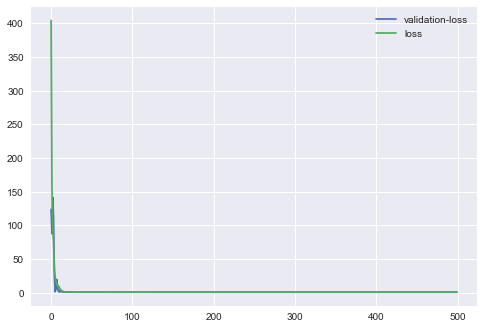

In [21]:
plt.style.use('seaborn')
plt.plot(history.history['val_loss'],label='validation-loss')
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.show()

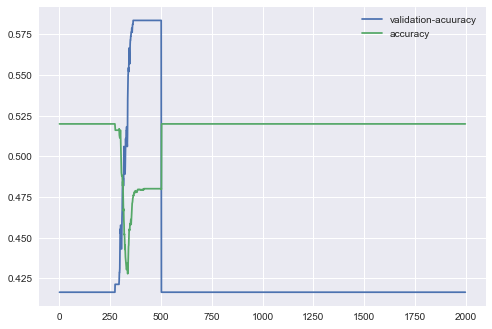

In [128]:
plt.style.use('seaborn')
plt.plot(history.history['val_binary_accuracy'],label='validation-acuuracy')
plt.plot(history.history['binary_accuracy'],label='accuracy')
plt.legend()
plt.show()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                72040     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 72,481
Trainable params: 72,481
Non-trainable params: 0
_________________________________________________________________
